<a href="https://colab.research.google.com/github/sharadnatarajSJSU/CMPE_255_MovieReccomend/blob/main/MovieRecommendationSystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mount drive into colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing all the datasets from Drive

In [ ]:
import pandas as pd
import seaborn as sbn
!pip install squarify
import squarify
import matplotlib.pyplot as plt
import numpy as np
path = "/content/drive/MyDrive/"
tags = pd.read_csv(path+'tags.csv')
movies = pd.read_csv(path+'movies.csv')
links = pd.read_csv(path+'links.csv')
ratings = pd.read_csv(path+'ratings.csv')

In [ ]:
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


In [ ]:
movies.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [ ]:
for df in [tags, movies, links, ratings]:
  print(df.head(25))
  print("-----------------------------------------------------------------------------------------------------------------")

    userId  movieId                 tag   timestamp
0        2    60756               funny  1445714994
1        2    60756     Highly quotable  1445714996
2        2    60756        will ferrell  1445714992
3        2    89774        Boxing story  1445715207
4        2    89774                 MMA  1445715200
5        2    89774           Tom Hardy  1445715205
6        2   106782               drugs  1445715054
7        2   106782   Leonardo DiCaprio  1445715051
8        2   106782     Martin Scorsese  1445715056
9        7    48516        way too long  1169687325
10      18      431           Al Pacino  1462138765
11      18      431            gangster  1462138749
12      18      431               mafia  1462138755
13      18     1221           Al Pacino  1461699306
14      18     1221               Mafia  1461699303
15      18     5995           holocaust  1455735472
16      18     5995          true story  1455735479
17      18    44665        twist ending  1456948283
18      18  

Finding the number of Unique Movie IDs in all the 4 dataSets

In [ ]:
len(movies.movieId.unique())

9742

In [ ]:
len(links.movieId.unique())

9742

In [ ]:
len(ratings.movieId.unique())

9724

In [ ]:
len(tags.movieId.unique())

1572

In [ ]:
data = pd.merge(movies, links)

In [ ]:
data.head()

,movieId,title,genres,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,113497,8844.0
2,3,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,114885,31357.0
4,5,Father of the Bride Part II (1995),Comedy,113041,11862.0


In [ ]:
data = pd.merge(data, ratings)

In [ ]:
data.head()

,movieId,title,genres,imdbId,tmdbId,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,17,4.5,1305696483


In [ ]:
data.shape

(100836, 8)

Merge Movies and Tags Dataset and create a metadata tag for each movie

In [ ]:
mixed = pd.merge(movies, tags, on='movieId', how='left')
mixed.head()

,movieId,title,genres,userId,tag,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336.0,pixar,1.139046e+09
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474.0,pixar,1.137207e+09
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,567.0,fun,1.525286e+09
3,2,Jumanji (1995),Adventure|Children|Fantasy,62.0,fantasy,1.528844e+09
4,2,Jumanji (1995),Adventure|Children|Fantasy,62.0,magic board game,1.528844e+09


In [ ]:
mixed.fillna("", inplace=True)
mixed = pd.DataFrame(mixed.groupby('movieId')['tag'].apply(lambda x: "%s" % ''.join(x)))
Final = pd.merge(movies, mixed, on='movieId', how='left')
Final['MetaData'] = Final[['tag', 'genres']].apply(lambda x: ' '.join(x), axis = 1)
Final[['movieId', 'title', 'MetaData']].head(3)

,movieId,title,MetaData
0,1,Toy Story (1995),pixarpixarfun Adventure|Animation|Children|Com...
1,2,Jumanji (1995),fantasymagic board gameRobin Williamsgame Adve...
2,3,Grumpier Old Men (1995),moldyold Comedy|Romance


In [ ]:
Final.shape
Final

,movieId,title,genres,tag,MetaData
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixarpixarfun,pixarpixarfun Adventure|Animation|Children|Com...
1,2,Jumanji (1995),Adventure|Children|Fantasy,fantasymagic board gameRobin Williamsgame,fantasymagic board gameRobin Williamsgame Adve...
2,3,Grumpier Old Men (1995),Comedy|Romance,moldyold,moldyold Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,,Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy,pregnancyremake,pregnancyremake Comedy
...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,,Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,,Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama,,Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,,Action|Animation


After combining the required dataset, find the most watched movies

In [ ]:
MostWatched = data.groupby("title", as_index=False)["rating"].count().sort_values(["rating"], ascending=False).rename(columns={"rating" : "times_watched"})
MostWatched

,title,times_watched
3158,Forrest Gump (1994),329
7593,"Shawshank Redemption, The (1994)",317
6865,Pulp Fiction (1994),307
7680,"Silence of the Lambs, The (1991)",279
5512,"Matrix, The (1999)",278
...,...,...
4773,King Solomon's Mines (1950),1
4772,King Solomon's Mines (1937),1
4771,King Ralph (1991),1
4769,King Kong Lives (1986),1


Here we can see that "Forest Gump" is the most watched Movie

Highly Rated Movies

In [ ]:
HighlyRated = data.groupby("title", as_index=False)["rating"].mean().sort_values(["rating"], ascending=False)
HighlyRated

,title,rating
3354,Gena the Crocodile (1969),5.0
8951,True Stories (1986),5.0
1986,Cosmic Scrat-tastrophe (2015),5.0
5269,Love and Pigeons (1985),5.0
7033,Red Sorghum (Hong gao liang) (1987),5.0
...,...,...
2482,Don't Look Now (1973),0.5
4617,Journey 2: The Mysterious Island (2012),0.5
4581,Joe Dirt 2: Beautiful Loser (2015),0.5
4556,Jesus Christ Vampire Hunter (2001),0.5


Some of the Highly Rated Movies are "Gena the Crocodile", "True Stories", "Cosmic Scrat-tastrophe", "Love and Pigeons", "Red Sorghum"

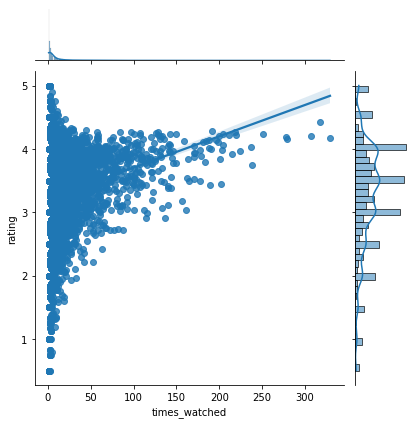

In [ ]:
plot = pd.merge(MostWatched,HighlyRated)
sbn.jointplot(x="times_watched", y="rating", data=plot ,kind="reg")

There is positive regression line between the two attributes. However, this is not a perfect correlation, that is most popular movies are not necessarily the highest rated ones

<BarContainer object of 19 artists>

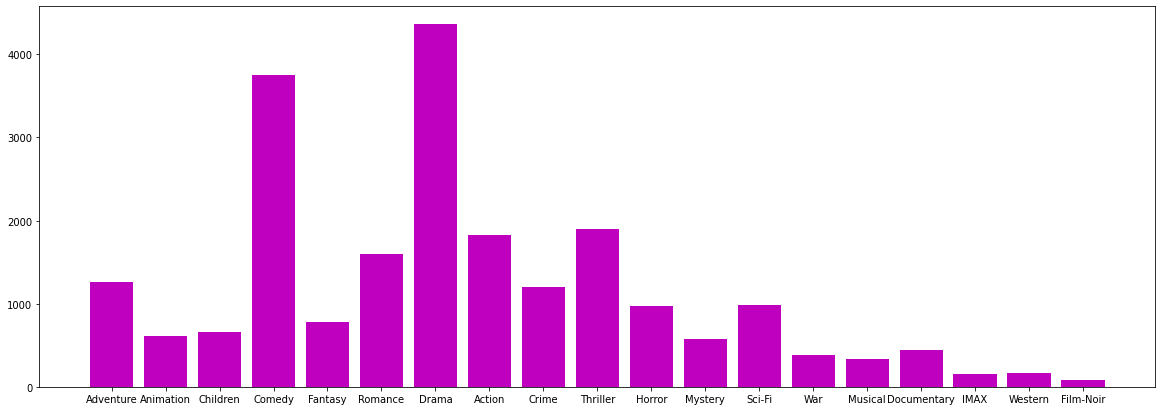

In [ ]:
plt.figure(figsize=(20,7))
genrelist = movies['genres'].apply(lambda genrelist_movie : str(genrelist_movie).split("|"))
genre_count = {}

for genrelist_movie in genrelist:
    for genre in genrelist_movie:
        if(genre_count.get(genre,False)):
            genre_count[genre]=genre_count[genre]+1
        else:
            genre_count[genre] = 1       
genre_count.pop("(no genres listed)")
plt.bar(genre_count.keys(),genre_count.values(),color='m')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


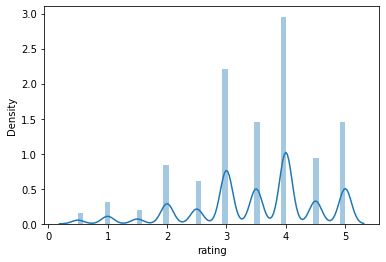

In [ ]:
sbn.distplot(ratings["rating"]);

In [ ]:
merge_ratings_movies = pd.merge(movies, ratings, on='movieId', how='inner')
merge_ratings_movies.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


In [ ]:
merge_ratings_movies = merge_ratings_movies.drop('timestamp', axis=1)
merge_ratings_movies.shape

(100836, 5)

In [ ]:
ratings_grouped_by_users = merge_ratings_movies.groupby('userId').agg([np.size, np.mean])
ratings_grouped_by_users.head(2)

movieId               rating          
          size          mean   size      mean
userId                                       
1          232   1854.603448  232.0  4.366379
2           29  70350.275862   29.0  3.948276

In [ ]:
ratings_grouped_by_movies = merge_ratings_movies.groupby('movieId').agg([np.mean], np.size)
ratings_grouped_by_movies.shape
ratings_grouped_by_movies.head()

,userId,rating
,mean,mean
movieId,,
1,306.530233,3.920930
2,329.554545,3.431818
3,283.596154,3.259615
4,219.857143,2.357143
5,299.571429,3.071429


In [ ]:
ratings_grouped_by_movies = ratings_grouped_by_movies.drop('userId', axis=1)

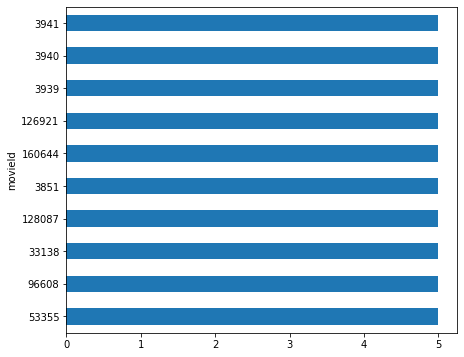

In [ ]:
ratings_grouped_by_movies['rating']['mean'].sort_values(ascending=False).head(10).plot(kind='barh', figsize=(7,6));

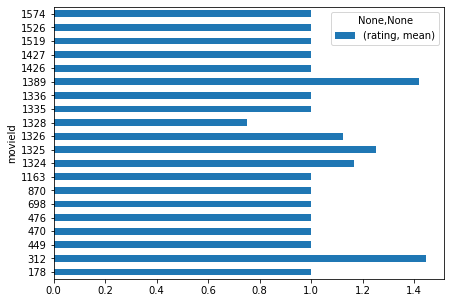

In [ ]:
low_rated_movies_filter = ratings_grouped_by_movies['rating']['mean']< 1.5
low_rated_movies = ratings_grouped_by_movies[low_rated_movies_filter]
low_rated_movies.head(20).plot(kind='barh', figsize=(7,5));

In [ ]:
low_rated_movies.head()

,rating
,mean
movieId,
178,1.000000
312,1.444444
449,1.000000
470,1.000000
476,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   movieId    100836 non-null  int64  
 1   title      100836 non-null  object 
 2   genres     100836 non-null  object 
 3   imdbId     100836 non-null  int64  
 4   tmdbId     100823 non-null  float64
 5   userId     100836 non-null  int64  
 6   rating     100836 non-null  float64
 7   timestamp  100836 non-null  int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
data.describe(include="all")

,movieId,title,genres,imdbId,tmdbId,userId,rating,timestamp
count,100836.000000,100836,100836,1.008360e+05,100823.000000,100836.000000,100836.000000,1.008360e+05
unique,NaN,9719,951,NaN,NaN,NaN,NaN,NaN
top,NaN,Forrest Gump (1994),Comedy,NaN,NaN,NaN,NaN,NaN
freq,NaN,329,7196,NaN,NaN,NaN,NaN,NaN
mean,19435.295718,NaN,NaN,3.515475e+05,20105.462633,326.127564,3.501557,1.205946e+09
std,35530.987199,NaN,NaN,6.220602e+05,53274.143620,182.618491,1.042529,2.162610e+08
min,1.000000,NaN,NaN,4.170000e+02,2.000000,1.000000,0.500000,8.281246e+08
25%,1199.000000,NaN,NaN,9.968500e+04,712.000000,177.000000,3.000000,1.019124e+09
50%,2991.000000,NaN,NaN,1.187690e+05,6957.000000,325.000000,3.500000,1.186087e+09
75%,8122.000000,NaN,NaN,3.149790e+05,11635.000000,477.000000,4.000000,1.435994e+09
